In [798]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [799]:
D = 2000

In [800]:
begin_token = np.random.randn(D//2).astype(np.float32)
begin_token = np.concatenate([begin_token, np.zeros(D//2).astype(np.float32)])

In [801]:
A = np.random.randn(D//2).astype(np.float32)
B = np.random.randn(D//2).astype(np.float32)
C = np.random.randn(D//2).astype(np.float32)

A = np.concatenate([A, np.zeros(D//2)])
B = np.concatenate([B, np.zeros(D//2)])
C = np.concatenate([C, np.zeros(D//2)])
A

array([-0.66431922,  0.02534494,  0.53793114, ...,  0.        ,
        0.        ,  0.        ])

In [802]:
dic = {
    'b': begin_token,
    'A': A,
    'B': B,
    'C': C
}

In [803]:
def string_to_token(s):
    for c in s:
        print(dic[c])
    return np.array([dic[c] for c in s]).astype(np.float32)

In [804]:
string_seq = ['b', 'C', 'B', 'A', 'C', 'A','A','A','C']

In [805]:
S = np.array(string_to_token(string_seq), dtype=np.float32)
T = len(S)
S.shape

[ 0.2888377   0.96662927 -0.85532063 ...  0.          0.
  0.        ]
[-0.60042512  1.10507965 -0.47043934 ...  0.          0.
  0.        ]
[ 0.42934212 -0.90976179  0.45698994 ...  0.          0.
  0.        ]
[-0.66431922  0.02534494  0.53793114 ...  0.          0.
  0.        ]
[-0.60042512  1.10507965 -0.47043934 ...  0.          0.
  0.        ]
[-0.66431922  0.02534494  0.53793114 ...  0.          0.
  0.        ]
[-0.66431922  0.02534494  0.53793114 ...  0.          0.
  0.        ]
[-0.66431922  0.02534494  0.53793114 ...  0.          0.
  0.        ]
[-0.60042512  1.10507965 -0.47043934 ...  0.          0.
  0.        ]


(9, 2000)

In [ ]:
# creat 4 positionnal embeddings
P = np.random.randn(T, D//2).astype(np.float32)
P = np.concatenate([P,np.zeros((T, D//2))], axis=1)

In [822]:
X =  P/5 +S

In [823]:
QK = np.zeros((D,D), dtype=np.float32)
for i in range(1, T):
    QK = QK + (P[i].reshape(D, 1) @ P[i-1].reshape(1, D))
QK

array([[-1.396197  ,  3.5053687 ,  1.2302401 , ..., -2.4934459 ,
         5.101637  ,  0.13564977],
       [-1.323003  , -4.8907294 ,  1.0551428 , ...,  4.0179906 ,
        -2.840534  , -0.6642201 ],
       [-2.4620702 ,  4.9821324 , -2.1538734 , ..., -0.10197598,
         1.3890891 , -0.40928757],
       ...,
       [ 3.8738437 ,  2.9909892 ,  1.9066174 , ...,  2.628034  ,
        -1.4045944 , -4.0470905 ],
       [-0.38926548, -3.5728397 , -2.2795117 , ...,  1.1390263 ,
        -1.972302  , -1.453723  ],
       [-0.00823534,  0.25011277, -2.730286  , ...,  2.4728427 ,
        -0.05796015,  4.248715  ]], dtype=float32)

In [824]:
# get attention matrix
Att = X @ QK @ (X.T)/ np.linalg.norm(X @ QK @ (X.T)) * 100
Att.shape

(9, 9)

In [825]:
def softmax(x, axis=None):
    x_max = np.max(x, axis=axis, keepdims=True)
    e_x = np.exp(x - x_max)
    return e_x / np.sum(e_x, axis=axis, keepdims=True)


In [826]:
Att = softmax(Att, axis=1)

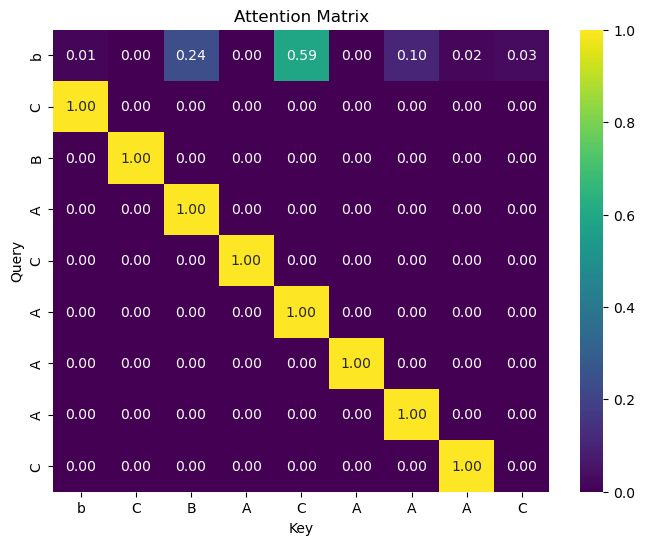

In [827]:
plt.figure(figsize=(8, 6))
sns.heatmap(Att, annot=True, fmt=".2f", cmap="viridis",
            xticklabels=string_seq, yticklabels=string_seq)
plt.title("Attention Matrix")
plt.xlabel("Key")
plt.ylabel("Query")
plt.show()


In [828]:
def permutation_matrix(D):
    assert D % 2 == 0, "D doit être pair"
    d_half = D // 2
    V = np.zeros((D, D))

    # Remplit les blocs pour permuter les deux moitiés
    V[:d_half, d_half:] = np.eye(d_half)  # Haut droit
    V[d_half:, :d_half] = np.eye(d_half)  # Bas gauche

    return V

V = permutation_matrix(D)


In [829]:
X@V

array([[ 0.0399017 , -0.24688073,  0.06611741, ...,  0.77898282,
        -0.06180052, -0.51241511],
       [ 0.26425797,  0.10749592, -0.19837923, ..., -0.4830083 ,
         1.25177062,  0.97159374],
       [ 0.06724538,  0.13821837, -0.21322438, ..., -1.35196614,
         2.21716738,  0.93690574],
       ...,
       [-0.39539534,  0.0854165 ,  0.29581445, ..., -1.34157181,
         0.12782277, -0.07581586],
       [-0.12158523, -0.19645241, -0.11835633, ..., -1.41708827,
        -0.28331506,  0.14141491],
       [ 0.40398437,  0.22925489, -0.04135302, ..., -0.69908094,
         0.82261443,  1.07021892]])

In [830]:
(X[1]@V) @A

-4.934781123517798

In [831]:
Z = Z = (Att @ X @ V)/np.linalg.norm(Att @ X @ V)+X/np.linalg.norm(X)
Z.shape

(9, 2000)

In [832]:
K_2 = np.zeros((D, D), dtype=np.float32)
K_2[:D//2, D//2:] = np.eye(D//2)  # Bas gauche

In [833]:
Att2 = Z @ (K_2) @ (Z.T) *60
Att2.shape

(9, 9)

In [834]:
Z[3] @ (V@B)

10.963972710665686

In [835]:
Att2 = softmax(Att2, axis=1)

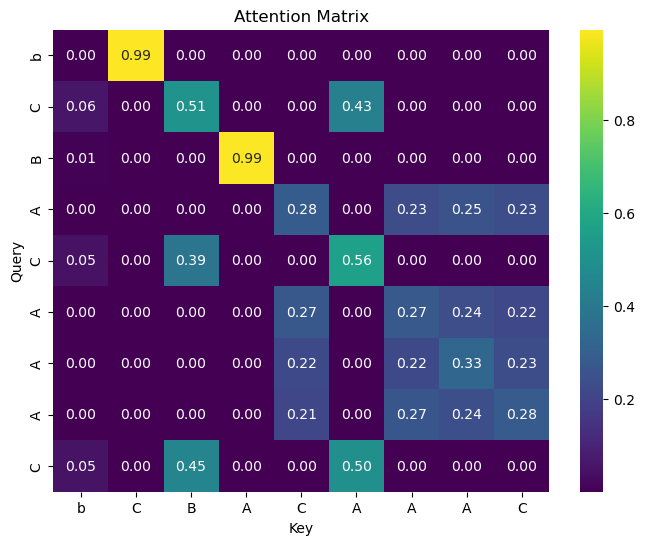

In [836]:
plt.figure(figsize=(8, 6))
sns.heatmap(Att2, annot=True, fmt=".2f", cmap="viridis",
            xticklabels=string_seq, yticklabels=string_seq)
plt.title("Attention Matrix")
plt.xlabel("Key")
plt.ylabel("Query")
plt.show()
